/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 6355 images belonging to 15 classes.
Found 270 images belonging to 15 classes.
Epoch 1/50
199/199 [==============================] - 67s 284ms/step - loss: 2.5732 - accuracy: 0.1577 - val_loss: 2.4820 - val_accuracy: 0.2037
Epoch 2/50
199/199 [==============================] - 26s 132ms/step - loss: 2.0593 - accuracy: 0.3273 - val_loss: 1.9732 - val_accuracy: 0.3259
Epoch 3/50
199/199 [==============================] - 27s 133ms/step - loss: 1.4102 - accuracy: 0.5500 - val_loss: 1.1571 - val_accuracy: 0.6444
Epoch 4/50
199/199 [==============================] - 27s 133ms/step - loss: 0.8515 - accuracy: 0.7306 - val_loss: 0.8205 - val_accuracy: 0.7630
Epoch 5/50
199/199 [==============================] - 25s 127ms/step - loss: 0.4771 - accuracy: 0.8600 - val_loss: 0.5456 - val_accuracy: 0.8259
Epoch 6/50
199/199 [==============================] - 26s 130ms/step - loss: 0.2382 - accuracy: 0.9383 - val_loss: 0.6559 - val_accuracy: 0.7926
Epoch 7/50
199/199 [=========================

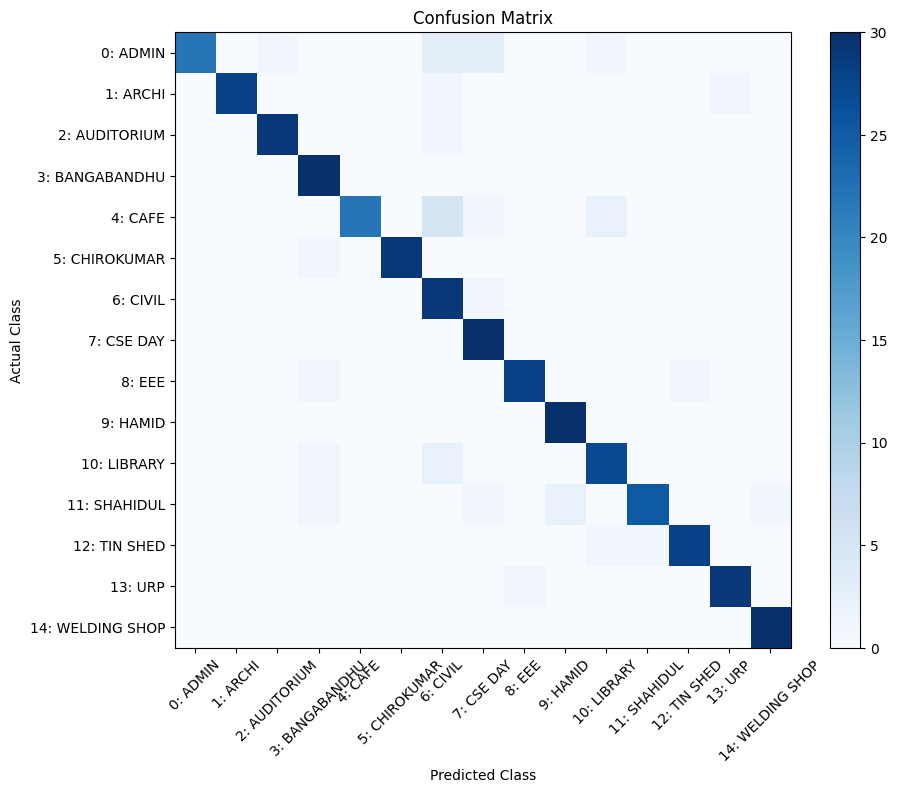

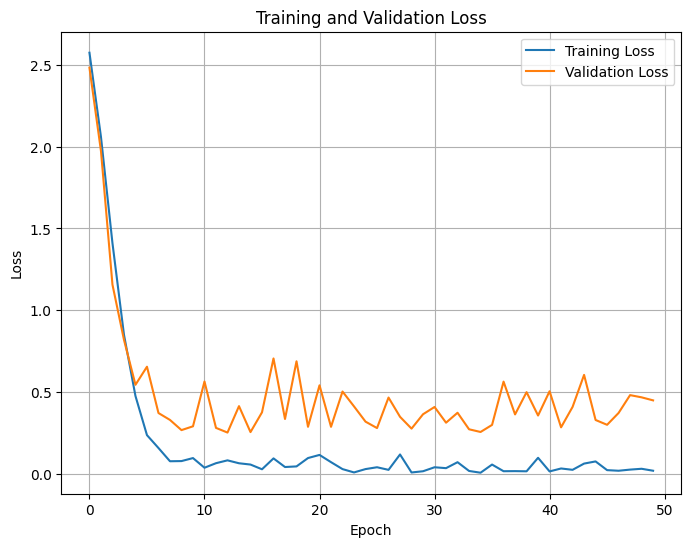

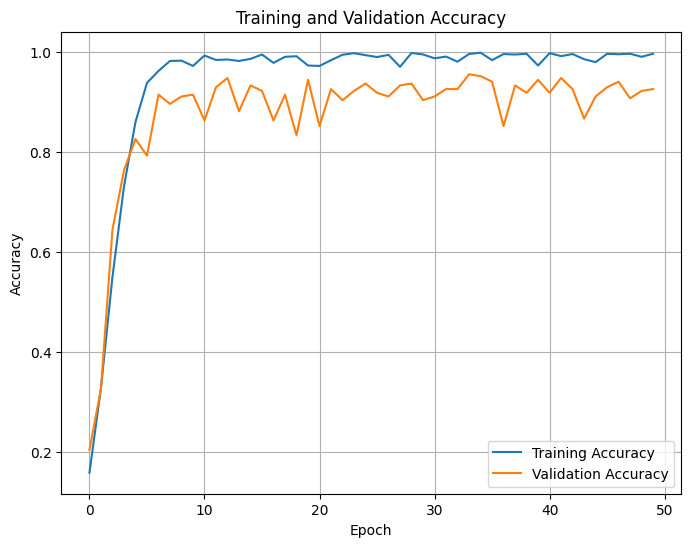

Class Precisions: [1.0, 1.0, 0.9666666666666667, 0.8823529411764706, 1.0, 1.0, 0.7073170731707317, 0.8333333333333334, 0.9655172413793104, 0.9375, 0.8709677419354839, 0.9615384615384616, 0.9655172413793104, 0.9666666666666667, 0.967741935483871]
Class Recalls: [0.7333333333333333, 0.9333333333333333, 0.9666666666666667, 1.0, 0.7333333333333333, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9333333333333333, 1.0, 0.9, 0.8333333333333334, 0.9333333333333333, 0.9666666666666667, 1.0]
Class F1 Scores: [0.846153846153846, 0.9655172413793104, 0.9666666666666667, 0.9375, 0.846153846153846, 0.983050847457627, 0.8169014084507042, 0.9090909090909091, 0.9491525423728815, 0.967741935483871, 0.8852459016393444, 0.8928571428571429, 0.9491525423728815, 0.9666666666666667, 0.9836065573770492]
Micro-Precision: 0.9244444444444444
Micro-Recall: 0.9244444444444444
Micro-F1: 0.9244444444444444
Top-1 Accuracy: 0.9244444444444444
Top-5 Accuracy: 0.9844444444444445


In [1]:
#"Model Training"

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/kaggle/input/dataset-ruet/basedata/basedata/training', target_size=(150, 150), batch_size=32, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory('/kaggle/input/dataset-ruet/basedata/basedata/validation', target_size=(150, 150), batch_size=32, class_mode='categorical')

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(15, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(train_generator, epochs=50, validation_data=valid_generator)

import os
model_dir = '/kaggle/working/model_study/64,128,256- 512,256,128,64,32,15'
os.makedirs(model_dir, exist_ok=True)
model.save(os.path.join(model_dir, 'my_model_64,128,256- 512,256,128,64,32,15.h5'))

loss_values = np.array(history.history['loss']).reshape(-1, 1)
accuracy_values = np.array(history.history['accuracy']).reshape(-1, 1)
val_loss_values = np.array(history.history['val_loss']).reshape(-1, 1)
val_accuracy_values = np.array(history.history['val_accuracy']).reshape(-1, 1)
file_name = '64,128,256- 512,256,128,64,32,15.csv'

results = np.column_stack((loss_values, accuracy_values, val_loss_values, val_accuracy_values))

csv_file_path = os.path.join(model_dir,file_name)
np.savetxt(csv_file_path, results, delimiter=',', header='Loss,Accuracy,Validation Loss,Validation Accuracy', comments='')

print("Loss values:", loss_values)
print("Accuracy values:", accuracy_values)
print("Validation loss values:", val_loss_values)
print("Validation accuracy values:", val_accuracy_values)
print("CSV file saved at:", csv_file_path)


#"Testing/Prediction"

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, accuracy_score
import os

test_data_dir = '/kaggle/input/dataset-ruet/basedata/basedata/testing'
test_images = []
ground_truth_labels = []
for class_name in os.listdir(test_data_dir):
    class_dir = os.path.join(test_data_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        img = image.load_img(image_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array /= 255.0
        test_images.append(img_array)
        ground_truth_labels.append(class_name)

test_images = np.array(test_images)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
label_to_index = {label: i for i, label in enumerate(train_generator.class_indices)}
ground_truth_indices = np.array([label_to_index[label] for label in ground_truth_labels])
class_names = list(train_generator.class_indices.keys())
class_numbers = [label_to_index[label] for label in class_names]
conf_matrix = confusion_matrix(ground_truth_indices, predicted_labels)
accuracy = accuracy_score(ground_truth_indices, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(train_generator.class_indices))
plt.xticks(tick_marks, [f"{class_numbers[i]}: {class_names[i]}" for i in tick_marks], rotation=45)
plt.yticks(tick_marks, [f"{class_numbers[i]}: {class_names[i]}" for i in tick_marks])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(accuracy_values, label='Training Accuracy')
plt.plot(val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid()
plt.show()


#"Performance Matrix Calculation"

from sklearn.metrics import confusion_matrix, accuracy_score
num_classes = conf_matrix.shape[0]

precisions = []
recalls = []
f1_scores = []

for i in range(num_classes):
    true_positives = conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
   
    if precision == 0 and recall == 0:
        f1_score = 0.0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

print("Class Precisions:", precisions)
print("Class Recalls:", recalls)
print("Class F1 Scores:", f1_scores)

from sklearn.metrics import precision_score, recall_score, f1_score

micro_precision = precision_score(ground_truth_indices, predicted_labels, average='micro')
micro_recall = recall_score(ground_truth_indices, predicted_labels, average='micro')
micro_f1 = f1_score(ground_truth_indices, predicted_labels, average='micro')
print("Micro-Precision:", micro_precision)
print("Micro-Recall:", micro_recall)
print("Micro-F1:", micro_f1)

top_1_accuracy = accuracy_score(ground_truth_indices, predicted_labels)
top_5_predictions = np.argsort(predictions, axis=1)[:, -5:]
top_5_accuracy = np.mean(np.array([ground_truth_indices[i] in top_5_predictions[i] for i in range(len(ground_truth_indices))]))

print("Top-1 Accuracy:", top_1_accuracy)
print("Top-5 Accuracy:", top_5_accuracy)

In [ ]:
confusion_matrix = [
    [22,  0,  1,  0,  0,  0,  3,  3,  0,  0,  1,  0,  0,  0,  0],
    [ 0, 28,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0],
    [ 0,  0, 29,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0, 22,  0,  5,  1,  0,  0,  2,  0,  0,  0,  0],
    [ 0,  0,  0,  1,  0, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0, 29,  1,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  1,  0,  0,  0,  0, 28,  0,  0,  0,  1,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  1,  0,  0,  2,  0,  0,  0, 27,  0,  0,  0,  0],
    [ 0,  0,  0,  1,  0,  0,  0,  1,  0,  2,  0, 25,  0,  0,  1],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1, 28,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, 29,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 30]
]

confusion_matrix = np.array(confusion_matrix)

TTP = np.diag(confusion_matrix)
TFP = np.sum(confusion_matrix, axis=0) - TTP
TFN = np.sum(confusion_matrix, axis=1) - TTP
TTN = np.sum(confusion_matrix) - (TTP + TFP + TFN)

print("True Positives (TTP):", TTP)
print("False Positives (TFP):", TFP)
print("False Negatives (TFN):", TFN)
print("True Negatives (TTN):", TTN)


In [2]:
#"Testing/Prediction"

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score
import os

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/kaggle/input/dataset-ruet/basedata/basedata/training', target_size=(150, 150), batch_size=32, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory('/kaggle/input/dataset-ruet/basedata/basedata/validation', target_size=(150, 150), batch_size=32, class_mode='categorical')

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu')) 
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(15, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.load_weights('/kaggle/working/model_study/64,128,256- 512,256,128,64,32,15/my_model_64,128,256- 512,256,128,64,32,15.h5')



import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, accuracy_score
import os

test_data_dir = '/kaggle/input/dataset-ruet/basedata/basedata/testing'
test_images = []
ground_truth_labels = []
for class_name in os.listdir(test_data_dir):
    class_dir = os.path.join(test_data_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        img = image.load_img(image_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array /= 255.0
        test_images.append(img_array)
        ground_truth_labels.append(class_name)

test_images = np.array(test_images)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
label_to_index = {label: i for i, label in enumerate(train_generator.class_indices)}
ground_truth_indices = np.array([label_to_index[label] for label in ground_truth_labels])
class_names = list(train_generator.class_indices.keys())
class_numbers = [label_to_index[label] for label in class_names]
conf_matrix = confusion_matrix(ground_truth_indices, predicted_labels)
accuracy = accuracy_score(ground_truth_indices, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

top_1_accuracy = accuracy_score(ground_truth_indices, predicted_labels)
top_5_predictions = np.argsort(predictions, axis=1)[:, -5:]
top_5_accuracy = np.mean(np.array([ground_truth_indices[i] in top_5_predictions[i] for i in range(len(ground_truth_indices))]))

print("Accuracy:", accuracy)
print("Top-1 Accuracy:", top_1_accuracy)
print("Top-5 Accuracy:", top_5_accuracy)


#"Performance Matrix Calculation"

from sklearn.metrics import confusion_matrix, accuracy_score
num_classes = conf_matrix.shape[0]

class_metrics = []
precisions = []
recalls = []
f1_scores = []
accuracies = []

for i in range(num_classes):
    true_positives = conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives
    true_negatives = np.sum(conf_matrix) - true_positives - false_positives - false_negatives
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
   
    if precision == 0 and recall == 0:
        f1_score = 0.0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    accuracy = (true_positives + true_negatives) / np.sum(conf_matrix)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    accuracies.append(accuracy)

    class_metrics.append({
        'Class': i + 1,
        'True Positives': true_positives,
        'True Negatives': true_negatives,
        'False Positives': false_positives,
        'False Negatives': false_negatives,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'Accuracy': accuracy
    })

average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f1_score = sum(f1_scores) / len(f1_scores)
average_accuracy = sum(accuracies) / len(accuracies)

print("Class Metrics:")
for metrics in class_metrics:
    print(f"Class {metrics['Class']} - Precision: {metrics['Precision']}, Recall: {metrics['Recall']}, F1 Score: {metrics['F1 Score']}, Accuracy: {metrics['Accuracy']}")
    print(f"TTP: {metrics['True Positives']}, TTN: {metrics['True Negatives']}, TFP: {metrics['False Positives']}, TFN: {metrics['False Negatives']}")

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1_score)
print("Average Accuracy:", average_accuracy)

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
num_classes = conf_matrix.shape[0]

class_names = [
    'ADMIN', 'ARCHI', 'AUDITORIUM', 'BANGABANDHU', 'CAFE',
    'CHIROKUMAR', 'CIVIL', 'CSE DAY', 'EEE', 'HAMID',
    'LIBRARY', 'SHAHIDUL', 'TIN SHED', 'URP', 'WELDING SHOP'
]

class_metrics = []
precisions = []
recalls = []
f1_scores = []
accuracies = []

for i in range(num_classes):
    true_positives = conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives
    true_negatives = np.sum(conf_matrix) - true_positives - false_positives - false_negatives
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
   
    if precision == 0 and recall == 0:
        f1_score = 0.0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    accuracy = (true_positives + true_negatives) / np.sum(conf_matrix)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    accuracies.append(accuracy)

    class_metrics.append({
        'Class': class_names[i],
        'TTP': true_positives,
        'TTN': true_negatives,
        'TFP': false_positives,
        'TFN': false_negatives,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'Accuracy': accuracy
    })

average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f1_score = sum(f1_scores) / len(f1_scores)
average_accuracy = sum(accuracies) / len(accuracies)

class_metrics.append({
    'Class': 'Average',
    'TTP': '',
    'TTN': '',
    'TFP': '',
    'TFN': '',
    'Precision': average_precision,
    'Recall': average_recall,
    'F1 Score': average_f1_score,
    'Accuracy': average_accuracy
})

metrics_df = pd.DataFrame(class_metrics)
metrics_df = metrics_df[['Class', 'TTP', 'TTN', 'TFP', 'TFN', 'Precision', 'Recall', 'F1 Score', 'Accuracy']]

print(metrics_df)

Found 6355 images belonging to 15 classes.
Found 270 images belonging to 15 classes.
15/15 [==============================] - 5s 13ms/step
Confusion Matrix:
[[22  0  1  0  0  0  3  3  0  0  1  0  0  0  0]
 [ 0 28  0  0  0  0  1  0  0  0  0  0  0  1  0]
 [ 0  0 29  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  5  1  0  0  2  0  0  0  0]
 [ 0  0  0  1  0 29  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 29  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 28  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  1  0  0  2  0  0  0 27  0  0  0  0]
 [ 0  0  0  1  0  0  0  1  0  2  0 25  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  1  1 28  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 30]]
Accuracy: 0.9244444444444444
Top-1 Accuracy: 0.9244444444444444
Top-5 Accuracy: 0.9844444444444445
Class Metrics:
Class 1 